<a href="https://colab.research.google.com/github/Gabriel-Arsego/Garsego_64061/blob/main/Assignment%201/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** - Neural Networks

Gabriel Augusto Arsego

In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#Here I import TensorFlow and Keras since they provide the tools necessary
#to build and train neural networks
#I import layers to gain access to neural network layer types Dense and
#Embedding
from tensorflow.keras import models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [40]:
results = []
#Here I created a "results" list in which I can record the results of each
#modification and later create a table with the compilation of all of them.

In [41]:
max_features = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
#This is loading the IMDB movie review dataset that was used in the example.
#I restricted the number of features to reduce complexity like indicated
#in the book.

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
#pad_sequences is making all reviews have a fixed-length input of 500 words.

print(len(x_train), "training samples")
print(len(x_test), "test samples")

25000 training samples
25000 test samples


**Baseline model**

In [42]:
model = keras.Sequential([
    layers.Embedding(max_features, 32, input_length=max_len),
    layers.Flatten(),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Here I create the model which will serve as the base for the modifications.
#The sigmoid function outputs a probability between 0 and 1, so that it
#represents the chance that the review is positive.

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)
#For this one, I used verbose=1, just to show the training progress.
#Later on I use verbose=0 to hide the progress bar.

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
val_acc = history.history["val_accuracy"][-1]
#Here I use model.evaluate() to test the model on data it's never "seen" before.

results.append({
    "Experiment": "Baseline",
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc
})
#Here I'm using .append to save the result in the results list.

print("Baseline -> Val:", val_acc, "Test:", test_acc)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5003 - loss: 0.6927 - val_accuracy: 0.5384 - val_loss: 0.6868
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.5766 - loss: 0.6672 - val_accuracy: 0.7596 - val_loss: 0.5991
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.7812 - loss: 0.5055 - val_accuracy: 0.8476 - val_loss: 0.3710
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9086 - loss: 0.2383 - val_accuracy: 0.8752 - val_loss: 0.3185
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9516 - loss: 0.1387 - val_accuracy: 0.8580 - val_loss: 0.3569
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9729 - loss: 0.0881 - val_accuracy: 0.8606 - val_loss: 0.3888
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9899 - loss: 0.0450 - val_accuracy: 0.8658 - val_loss: 0.4053
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9935 - loss: 0.0306 - val_accuracy: 0.8634 - 

- From this point on, I'm using the same type of coding, but making changes whenever necessary to create the different experiments.



**1 Hidden Layer**

In [43]:
model = keras.Sequential([
    layers.Embedding(max_features, 32, input_length=max_len),
    layers.Flatten(),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Removed one line from the baseline model.

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=0
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
val_acc = history.history["val_accuracy"][-1]

results.append({
    "Experiment": "1 Hidden Layer",
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc
})

print("1 Hidden Layer -> Val:", val_acc, "Test:", test_acc)

1 Hidden Layer -> Val: 0.8697999715805054 Test: 0.8652799725532532


**3 Hidden Layers**

In [44]:
model = keras.Sequential([
    layers.Embedding(max_features, 32, input_length=max_len),
    layers.Flatten(),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Added one line to the baseline model.

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=0
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
val_acc = history.history["val_accuracy"][-1]

results.append({
    "Experiment": "3 Hidden Layers",
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc
})

print("3 Hidden Layers -> Val:", val_acc, "Test:", test_acc)

3 Hidden Layers -> Val: 0.8677999973297119 Test: 0.8619999885559082


**32 Units (2 layers)**

In [45]:
model = keras.Sequential([
    layers.Embedding(max_features, 32, input_length=max_len),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Changed units from 16 to 32.

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=0
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
val_acc = history.history["val_accuracy"][-1]

results.append({
    "Experiment": "32 Units",
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc
})

print("32 Units -> Val:", val_acc, "Test:", test_acc)

32 Units -> Val: 0.8632000088691711 Test: 0.8626000285148621


**64 Units (2 layers)**

In [46]:
model = keras.Sequential([
    layers.Embedding(max_features, 32, input_length=max_len),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Changed units from 16 to 64.

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=0
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
val_acc = history.history["val_accuracy"][-1]

results.append({
    "Experiment": "64 Units",
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc
})

print("64 Units -> Val:", val_acc, "Test:", test_acc)

64 Units -> Val: 0.8636000156402588 Test: 0.861240029335022


**Tanh Activation**

In [47]:
model = keras.Sequential([
    layers.Embedding(max_features, 32, input_length=max_len),
    layers.Flatten(),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
#Replaced ReLU by Tanh activation.

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=0
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
val_acc = history.history["val_accuracy"][-1]

results.append({
    "Experiment": "Tanh Activation",
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc
})

print("Tanh Activation -> Val:", val_acc, "Test:", test_acc)

Tanh Activation -> Val: 0.857200026512146 Test: 0.8577600121498108


**MSE Loss**

In [48]:
model = keras.Sequential([
    layers.Embedding(max_features, 32, input_length=max_len),
    layers.Flatten(),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["accuracy"]
)
#Used MSE for the loss function.

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=0
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
val_acc = history.history["val_accuracy"][-1]

results.append({
    "Experiment": "MSE Loss",
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc
})

print("MSE Loss -> Val:", val_acc, "Test:", test_acc)

MSE Loss -> Val: 0.8619999885559082 Test: 0.8567600250244141


**Dropout**

In [49]:
model = keras.Sequential([
    layers.Embedding(max_features, 32, input_length=max_len),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Added a Dropout layer.

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=0
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
val_acc = history.history["val_accuracy"][-1]

results.append({
    "Experiment": "Dropout",
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc
})

print("Dropout -> Val:", val_acc, "Test:", test_acc)

Dropout -> Val: 0.8626000285148621 Test: 0.8582800030708313


**Results Table:**

In [50]:
df = pd.DataFrame(results)
df


,Experiment,Validation Accuracy,Test Accuracy
0,Baseline,0.8660,0.86316
1,1 Hidden Layer,0.8698,0.86528
2,3 Hidden Layers,0.8678,0.86200
3,32 Units,0.8632,0.86260
4,64 Units,0.8636,0.86124
5,Tanh Activation,0.8572,0.85776
6,MSE Loss,0.8620,0.85676
7,Dropout,0.8626,0.85828


- The experiment with 1 Hidden Layer has the highest validation accuracy, outperforming the baseline model. We may assume that the extra layer in the baseline wasn't necessary. The difference in performance is not that big, but the simpler model generalized better.

- With 3 Hidden Layers the validation accuracy increased in comparison to the baseline, but less than 1 Hidden Layer.

- The 32 Units model performed very similarly to the baseline, but did not increase performance.

- With 64 Units the performance dropped, possibly caused overfitting.

- The Tanh Activation had the lowest validation accuracy, which makes sense, considering it isn't a popular method anymore.

- With MSE loss function the validation accuracy dropped slightly. Binary crossentropy performed better, because it was used for a binary classification.

- Dropout also had a similar performance to the baseline and did not show a big improvement.

**Graph:**

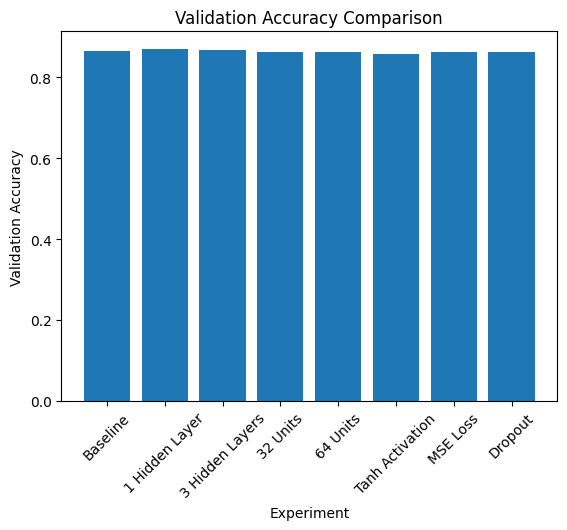

In [51]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df["Experiment"], df["Validation Accuracy"])
plt.xticks(rotation=45)
plt.xlabel("Experiment")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison")
plt.show()

**Conclusion**

  Reducing the model to a single layer resulted in the highest validation accuracy (0.8694) for the IMDB dataset. In this case the simplest model, in terms of layers and units, generated the best results, outperforming the baseline.

  Since dropout regularization did not significantly improve validation accuracy in this case, we could say that the baseline model was already well-calibrated and wasn't overfitting too much.